# Data Science - Exercise 7
Data Cleaning and statistic Excercise

Following is research data for investigating the disease situation in a given area. This research recruits volunteers who must be at least 40 years old.

There are two files containing the patient's information

Patient_information:

Patient_ID: numeric the patient id with 7 digits
Sex: string Male or Female
Age: numeric The Age of recruitment
BMI: numeric Body Mass Index, should be between 15-60
Smoking_status: string Never, Previous, current, Prefer not to answer
Disease: factor 1 means disease, 2 means healthy

Hosptial Visit:
Patient_ID: numeric the patient id with 7 digits
VisitDate: Date, the date of the patient's visit hospital. the data is collected from the year 1950 to 2023

Task : Data Clean

1. The missing value from BMI can be replaced with the mean value of  its regarding gender
2. Do the sanity check for all the columns in 2 files, and remove the sample which does not pass the sanity check
3. Calculate the number of visits of each patient, if the VisitDate is missing, means they don't visit the hospital during that period
4. Merge two files with columns: Patient_ID, Sex, Age, BMI, Smoking_status, Number_of_visit, Disease

Task: Statistics (you don't need to check the model assumption in this exercise)

1. Is the BMI different between the healthy and control group? make the box/violin chart
2. Is the proportion of Smoke status different between the healthy and control group?
3. Is the smoke status related to the number of Hospital visits regardless of the disease? (ignore the "Prefer not to answer")
4. Is the number of visits higher in the Disease group than in the Healthy group?
5. Do Male has a higher current smoke percentage compared to Female?

please write a conclusion for each task, not only run the statistical test without an explanation

---
note: I keep calling the patient_id participant_id

# import datasets

In [1]:
#Load date.csv
import pandas as pd
df_hospital_visit = pd.read_csv('https://github.com/WHPAN0108/BHT-DataScience-S23/blob/main/data_clean/data/date.csv?raw=true')
df_hospital_visit

,Participant_ID,VisitDate
0,1003300,1/7/2022
1,1003300,27/10/2021
2,1004025,19/05/2010
3,1005551,25/08/2021
4,1005551,29/06/2021
...,...,...
2886,6011693,27/10/2017
2887,6015403,14/08/2018
2888,6019982,19/01/2015
2889,6020094,13/06/2021


In [2]:
#Load patient_info.csv
df_patient_info = pd.read_csv('https://github.com/WHPAN0108/BHT-DataScience-S23/blob/main/data_clean/data/patient_info.csv?raw=true')
df_patient_info

,Participant_ID,Sex,Age,Smoking_status,BMI,Disease
0,1003300,Male,62,Previous,33.7597,2
1,1004025,Male,60,Previous,28.1173,1
2,1005551,Male,69,Previous,26.4159,2
3,1005594,Male,64,Previous,24.7550,1
4,1005624,Male,64,Previous,35.0773,2
...,...,...,...,...,...,...
2213,6009769,Male,48,Previous,39.3345,2
2214,6011693,Male,62,Previous,30.8813,2
2215,6015403,Female,60,Previous,34.7276,1
2216,6019982,Male,54,Never,25.3287,2


#  replace missing BMI values with gender corresponding BMI values

In [3]:
#there is a missing value for the BMI
df_patient_info.iloc[93]

Participant_ID     1257234
Sex                   Male
Age                     69
Smoking_status    Previous
BMI                    NaN
Disease                  1
Name: 93, dtype: object

In [4]:
#calculate the mean BMI for each Sex
df_male = df_patient_info[df_patient_info['Sex'] == 'Male']
df_female = df_patient_info[df_patient_info['Sex'] == 'Female']
mean_bmi_male = df_male['BMI'].mean()
mean_bmi_female = df_patient_info['BMI'].mean()
mean_bmi_male

29.09244492661136

In [5]:
#replace missing values from BMI with the mean of the same sex type
df_patient_info.loc[(df_patient_info['BMI'].isnull()) & (df_patient_info['Sex'] == 'Male'), 'BMI'] = mean_bmi_male
df_patient_info.loc[(df_patient_info['BMI'].isnull()) & (df_patient_info['Sex'] == 'Female'), 'BMI'] = mean_bmi_female
df_patient_info.iloc[93]

Participant_ID      1257234
Sex                    Male
Age                      69
Smoking_status     Previous
BMI               29.092445
Disease                   1
Name: 93, dtype: object

 # sanity check for df_patient_info

In [6]:
# Remove rows where 'Participant_ID' is not numeric or does not have 7 digits
is_numeric = df_patient_info['Participant_ID'].astype(str).str.isnumeric()
has_7_digits = df_patient_info['Participant_ID'].astype(str).str.len() == 7
print("Rows where Patient_ID is not numeric or does not have 7 digits:")
print(df_patient_info[~(is_numeric & has_7_digits)])
df_patient_info = df_patient_info[is_numeric & has_7_digits]
df_patient_info

Rows where Patient_ID is not numeric or does not have 7 digits:
Empty DataFrame
Columns: [Participant_ID, Sex, Age, Smoking_status, BMI, Disease]
Index: []


,Participant_ID,Sex,Age,Smoking_status,BMI,Disease
0,1003300,Male,62,Previous,33.7597,2
1,1004025,Male,60,Previous,28.1173,1
2,1005551,Male,69,Previous,26.4159,2
3,1005594,Male,64,Previous,24.7550,1
4,1005624,Male,64,Previous,35.0773,2
...,...,...,...,...,...,...
2213,6009769,Male,48,Previous,39.3345,2
2214,6011693,Male,62,Previous,30.8813,2
2215,6015403,Female,60,Previous,34.7276,1
2216,6019982,Male,54,Never,25.3287,2


In [7]:
# Remove rows where Sex is not 'Male' or 'Female'
print("Rows where Sex is not 'Male' or 'Female':")
print(df_patient_info[~df_patient_info['Sex'].isin(['Male', 'Female'])])
df_patient_info = df_patient_info[df_patient_info['Sex'].isin(['Male', 'Female'])]
df_patient_info

Rows where Sex is not 'Male' or 'Female':
Empty DataFrame
Columns: [Participant_ID, Sex, Age, Smoking_status, BMI, Disease]
Index: []


,Participant_ID,Sex,Age,Smoking_status,BMI,Disease
0,1003300,Male,62,Previous,33.7597,2
1,1004025,Male,60,Previous,28.1173,1
2,1005551,Male,69,Previous,26.4159,2
3,1005594,Male,64,Previous,24.7550,1
4,1005624,Male,64,Previous,35.0773,2
...,...,...,...,...,...,...
2213,6009769,Male,48,Previous,39.3345,2
2214,6011693,Male,62,Previous,30.8813,2
2215,6015403,Female,60,Previous,34.7276,1
2216,6019982,Male,54,Never,25.3287,2


In [8]:
# Remove rows where Age is not numeric
print("Rows where Age is not numeric:")
print(df_patient_info[~df_patient_info['Age'].astype(str).str.isnumeric()])
df_patient_info = df_patient_info[df_patient_info['Age'].astype(str).str.isnumeric()]
df_patient_info

Rows where Age is not numeric:
Empty DataFrame
Columns: [Participant_ID, Sex, Age, Smoking_status, BMI, Disease]
Index: []


,Participant_ID,Sex,Age,Smoking_status,BMI,Disease
0,1003300,Male,62,Previous,33.7597,2
1,1004025,Male,60,Previous,28.1173,1
2,1005551,Male,69,Previous,26.4159,2
3,1005594,Male,64,Previous,24.7550,1
4,1005624,Male,64,Previous,35.0773,2
...,...,...,...,...,...,...
2213,6009769,Male,48,Previous,39.3345,2
2214,6011693,Male,62,Previous,30.8813,2
2215,6015403,Female,60,Previous,34.7276,1
2216,6019982,Male,54,Never,25.3287,2


In [9]:
# Remove rows where BMI is not between 15 and 60
is_above_15 = df_patient_info['BMI'] >= 15
is_below_60 = df_patient_info['BMI'] <= 60
print("Rows where BMI is not between 15 and 60:")
print(df_patient_info[~(is_above_15 & is_below_60)])
df_patient_info = df_patient_info[is_above_15 & is_below_60]
df_patient_info
#found 2 in rows 305 and 1391

Rows where BMI is not between 15 and 60:
      Participant_ID   Sex  Age Smoking_status       BMI  Disease
305          1744690  Male   63       Previous  -31.4133        2
1391         4211238  Male   68       Previous  100.3570        1


,Participant_ID,Sex,Age,Smoking_status,BMI,Disease
0,1003300,Male,62,Previous,33.7597,2
1,1004025,Male,60,Previous,28.1173,1
2,1005551,Male,69,Previous,26.4159,2
3,1005594,Male,64,Previous,24.7550,1
4,1005624,Male,64,Previous,35.0773,2
...,...,...,...,...,...,...
2213,6009769,Male,48,Previous,39.3345,2
2214,6011693,Male,62,Previous,30.8813,2
2215,6015403,Female,60,Previous,34.7276,1
2216,6019982,Male,54,Never,25.3287,2


In [10]:
# Remove rows where Smoking_status is not one of the specified values
print("Rows where Smoking_status is not one of the specified values:")
print(df_patient_info[~df_patient_info['Smoking_status'].isin(['Never', 'Previous', 'Current', 'Prefer not to answer'])])
df_patient_info = df_patient_info[df_patient_info['Smoking_status'].isin(['Never', 'Previous', 'Current', 'Prefer not to answer'])]
df_patient_info
#found 3 in lines 1255, 1340 and 1926 with NaN values

Rows where Smoking_status is not one of the specified values:
      Participant_ID     Sex  Age Smoking_status      BMI  Disease
1255         3919665  Female   67            NaN  25.0331        2
1340         4113188    Male   67            NaN  29.0688        2
1826         5135454    Male   53            NaN  36.1323        2


,Participant_ID,Sex,Age,Smoking_status,BMI,Disease
0,1003300,Male,62,Previous,33.7597,2
1,1004025,Male,60,Previous,28.1173,1
2,1005551,Male,69,Previous,26.4159,2
3,1005594,Male,64,Previous,24.7550,1
4,1005624,Male,64,Previous,35.0773,2
...,...,...,...,...,...,...
2213,6009769,Male,48,Previous,39.3345,2
2214,6011693,Male,62,Previous,30.8813,2
2215,6015403,Female,60,Previous,34.7276,1
2216,6019982,Male,54,Never,25.3287,2


In [11]:
# Remove rows where Disease is not 1 or 2
print("Rows where Disease is not 1 or 2:")
print(df_patient_info[~df_patient_info['Disease'].isin([1, 2])])
df_patient_info = df_patient_info[df_patient_info['Disease'].isin([1, 2])]
df_patient_info

Rows where Disease is not 1 or 2:
Empty DataFrame
Columns: [Participant_ID, Sex, Age, Smoking_status, BMI, Disease]
Index: []


,Participant_ID,Sex,Age,Smoking_status,BMI,Disease
0,1003300,Male,62,Previous,33.7597,2
1,1004025,Male,60,Previous,28.1173,1
2,1005551,Male,69,Previous,26.4159,2
3,1005594,Male,64,Previous,24.7550,1
4,1005624,Male,64,Previous,35.0773,2
...,...,...,...,...,...,...
2213,6009769,Male,48,Previous,39.3345,2
2214,6011693,Male,62,Previous,30.8813,2
2215,6015403,Female,60,Previous,34.7276,1
2216,6019982,Male,54,Never,25.3287,2


# sanity check for df_hospital_visit

In [12]:
# Remove rows where 'Participant_ID' is not numeric or does not have 7 digits
is_numeric = df_hospital_visit['Participant_ID'].astype(str).str.isnumeric()
has_7_digits = df_hospital_visit['Participant_ID'].astype(str).str.len() == 7
print("Rows where Patient_ID is not numeric or does not have 7 digits:")
print(df_hospital_visit[~(is_numeric & has_7_digits)])
df_hospital_visit = df_hospital_visit[is_numeric & has_7_digits]
df_hospital_visit

Rows where Patient_ID is not numeric or does not have 7 digits:
Empty DataFrame
Columns: [Participant_ID, VisitDate]
Index: []


,Participant_ID,VisitDate
0,1003300,1/7/2022
1,1003300,27/10/2021
2,1004025,19/05/2010
3,1005551,25/08/2021
4,1005551,29/06/2021
...,...,...
2886,6011693,27/10/2017
2887,6015403,14/08/2018
2888,6019982,19/01/2015
2889,6020094,13/06/2021


In [13]:
df_hospital_visit.iloc[23] #NaN value that gets removed

Participant_ID    1041231
VisitDate             NaN
Name: 23, dtype: object

In [14]:
# Remove rows where VisitDate is not between 1950 and 2023
#for this, we have to convert the date into a datetime first:
df_hospital_visit['VisitDate'] = pd.to_datetime(df_hospital_visit['VisitDate'], format='%d/%m/%Y') #would raise an error if its not all dates
is_after_1950 = df_hospital_visit['VisitDate'].dt.year >= 1950
is_before_2023 = df_hospital_visit['VisitDate'].dt.year <= 2023
print("Rows where VisitDate is not between 1950 and 2023:")
print(df_hospital_visit[~(is_after_1950 & is_before_2023)])
df_hospital_visit = df_hospital_visit[(is_after_1950 & is_before_2023)]
df_hospital_visit
#several NaTs and even an entry from 1700 in line 124! (86 total)

Rows where VisitDate is not between 1950 and 2023:
      Participant_ID  VisitDate
23           1041231        NaT
53           1131574        NaT
56           1138258        NaT
79           1189620        NaT
124          1275182 1700-01-08
...              ...        ...
2735         5756558        NaT
2767         5807548        NaT
2804         5873537        NaT
2824         5919950        NaT
2834         5928617        NaT

[86 rows x 2 columns]


,Participant_ID,VisitDate
0,1003300,2022-07-01
1,1003300,2021-10-27
2,1004025,2010-05-19
3,1005551,2021-08-25
4,1005551,2021-06-29
...,...,...
2886,6011693,2017-10-27
2887,6015403,2018-08-14
2888,6019982,2015-01-19
2889,6020094,2021-06-13


In [15]:
# Calculate the number of visits for each patient
num_visits = df_hospital_visit.groupby('Participant_ID').size().reset_index(name='num_visits')
num_visits


,Participant_ID,num_visits
0,1003300,2
1,1004025,1
2,1005551,2
3,1005594,1
4,1005624,2
...,...,...
2127,6009769,1
2128,6011693,4
2129,6015403,1
2130,6019982,1


# merge tables and set num_visits to 0 if na 

In [16]:
statistics_df = pd.merge(df_patient_info, num_visits, on='Participant_ID', how='left')

# Set Number_of_visit to 0 for patients without a value
statistics_df['num_visits'] = statistics_df['num_visits'].fillna(0)
statistics_df

,Participant_ID,Sex,Age,Smoking_status,BMI,Disease,num_visits
0,1003300,Male,62,Previous,33.7597,2,2.0
1,1004025,Male,60,Previous,28.1173,1,1.0
2,1005551,Male,69,Previous,26.4159,2,2.0
3,1005594,Male,64,Previous,24.7550,1,1.0
4,1005624,Male,64,Previous,35.0773,2,2.0
...,...,...,...,...,...,...,...
2208,6009769,Male,48,Previous,39.3345,2,1.0
2209,6011693,Male,62,Previous,30.8813,2,4.0
2210,6015403,Female,60,Previous,34.7276,1,1.0
2211,6019982,Male,54,Never,25.3287,2,1.0


In [17]:
print("Entries with 0 visits:")
print(statistics_df[statistics_df['num_visits'] == 0])

Entries with 0 visits:
      Participant_ID     Sex  Age Smoking_status        BMI  Disease   
16           1041231    Male   65          Never  27.853300        1  \
43           1131574  Female   69          Never  32.845400        1   
46           1138258    Male   65       Previous  32.100300        1   
64           1189620    Male   46          Never  23.312000        2   
98           1275182    Male   61          Never  26.963800        2   
...              ...     ...  ...            ...        ...      ...   
2101         5756558  Female   69          Never  27.027000        1   
2127         5807548    Male   60          Never  29.092445        1   
2152         5873537    Male   65          Never  32.769600        1   
2166         5919950    Male   56          Never  35.891500        2   
2172         5928617  Female   68       Previous  28.628800        1   

      num_visits  
16           0.0  
43           0.0  
46           0.0  
64           0.0  
98           0.0 

# sanity check summary
found 2 rows where BMI is not between 15 and 60 <br />
found 3 rows with NaN smoking status after that<br />
and 86 lines with NaN values or values of VisitDate that are not between 1950 and 2023 <br />

# 1. Is the BMI different between the healthy and control group? make the box/violin chart


<Axes: xlabel='Group', ylabel='BMI'>

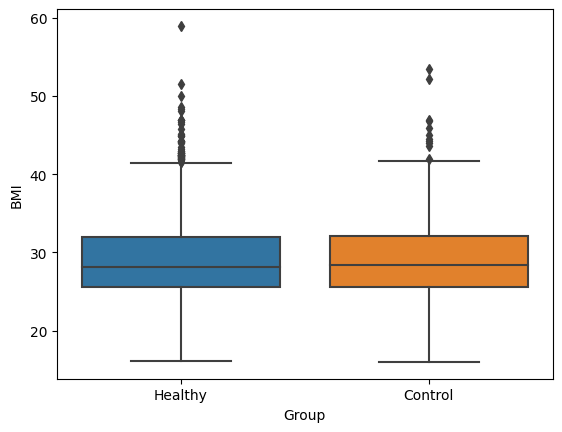

In [18]:
import seaborn as sns
# Map the Disease column to 'Healthy' and 'Control' labels
statistics_df['Group'] = statistics_df['Disease'].map({1: 'Control', 2: 'Healthy'})

# Create a box plot of BMI by group
sns.boxplot(x='Group', y='BMI', data=statistics_df) #1 is control, 2 is healthy

<Axes: xlabel='Group', ylabel='BMI'>

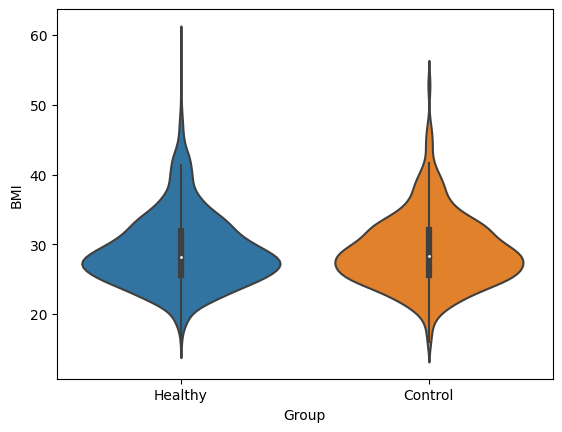

In [19]:
# Create a violin plot of BMI by group
sns.violinplot(x='Group', y='BMI', data=statistics_df) #1 is control, 2 is healthy

the BMI does not appear to be very different between the control group and healthy group as far as I can see. But better be save than sorry and perform a t-test:

In [20]:
# Split the data into healthy and control groups
bmi_control_group = statistics_df[statistics_df['Disease'] == 1]['BMI']
bmi_control_group

1       28.1173
3       24.7550
8       30.0826
15      23.7645
16      27.8533
         ...   
2184    23.2884
2188    35.8782
2193    29.6567
2205    27.4380
2210    34.7276
Name: BMI, Length: 565, dtype: float64

In [21]:
bmi_healthy_group = statistics_df[statistics_df['Disease'] == 2]['BMI']
bmi_healthy_group

0       33.7597
2       26.4159
4       35.0773
5       21.6764
6       26.9529
         ...   
2207    29.1140
2208    39.3345
2209    30.8813
2211    25.3287
2212    24.2972
Name: BMI, Length: 1648, dtype: float64

In [22]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(bmi_control_group, bmi_healthy_group)

# Print the results
print(f"T-test statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The BMI is significantly different between the Disease and Healthy groups.")
else:
    print("The BMI is not significantly different between the Disease and Healthy groups.")

T-test statistic: -0.19
P-value: 0.8481
The BMI is not significantly different between the Disease and Healthy groups.


# 2. Is the proportion of Smoke status different between the healthy and control group?
->chi-squared. Is/ is not significantly different 

In [23]:
from scipy.stats import chi2_contingency

# Create a contingency table of Smoking_status by Group
contingency_table = pd.crosstab(statistics_df['Smoking_status'], statistics_df['Group'])

contingency_table

Group,Control,Healthy
Smoking_status,,
Current,92,258
Never,214,636
Prefer not to answer,5,4
Previous,254,750


In [24]:
# Perform a chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared test statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("The proportion of smoking status is significantly different between the healthy and control groups.")
else:
    print("The proportion of smoking status is not significantly different between the healthy and control groups.")

Chi-squared test statistic: 4.46
P-value: 0.2162
The proportion of smoking status is not significantly different between the healthy and control groups.


<Axes: xlabel='Group', ylabel='count'>

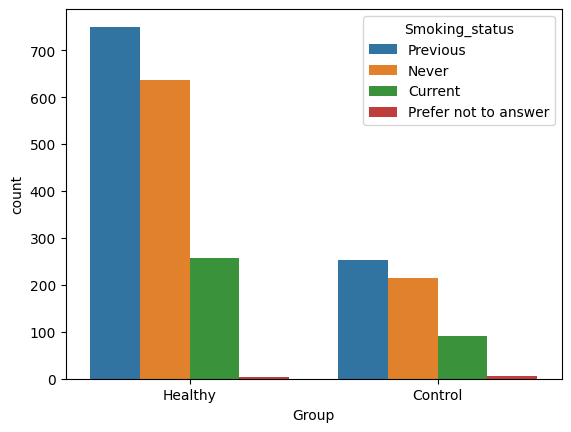

In [25]:
# Create a bar plot of Smoke status by group
sns.countplot(x='Group', hue='Smoking_status', data=statistics_df)

# 3. Is the smoke status related to the number of Hospital visits regardless of the disease? (ignore the "Prefer not to answer")
-> chi-squared; Is/ Is not strongly correlated aka strong relationship. Or correlation directly

In [26]:
# Remove rows where Smoking_status is 'Prefer not to answer'
statistics_df2 = statistics_df.copy()
statistics_df2 = statistics_df2[statistics_df2['Smoking_status'] != 'Prefer not to answer']

In [27]:
# Calculate the correlation between Smoking_status and num_visits
corr = statistics_df2['Smoking_status'].astype('category').cat.codes.corr(statistics_df2['num_visits'])

# Print the results
print(f"Correlation between Smoking_status and num_visits: {corr:.2f}")

if abs(corr) > 0.5:
    print("There is a strong relationship between smoking status and the number of hospital visits.")
else:
    print("There is not a strong relationship between smoking status and the number of hospital visits.")

Correlation between Smoking_status and num_visits: -0.01
There is not a strong relationship between smoking status and the number of hospital visits.


In [28]:
# Create a contingency table of Smoke status by number of hospital visits
contingency_table = pd.crosstab(statistics_df2['Smoking_status'], statistics_df2['num_visits'])
contingency_table

num_visits,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,13.0,14.0,17.0
Smoking_status,,,,,,,,,,,,,
Current,15,254,65,8,5,0,1,0,1,0,1,0,0
Never,38,662,108,18,12,6,1,1,1,2,0,1,0
Previous,31,783,132,34,18,1,2,1,0,1,0,0,1


In [29]:
# Perform a chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared test statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
if p < 0.05:
    print("Smoke status is significantly related to the number of hospital visits.")
else:
    print("Smoke status is not significantly related to the number of hospital visits.")

Chi-squared test statistic: 33.14
P-value: 0.1012
Smoke status is not significantly related to the number of hospital visits.


<Axes: xlabel='num_visits', ylabel='Smoking_status'>

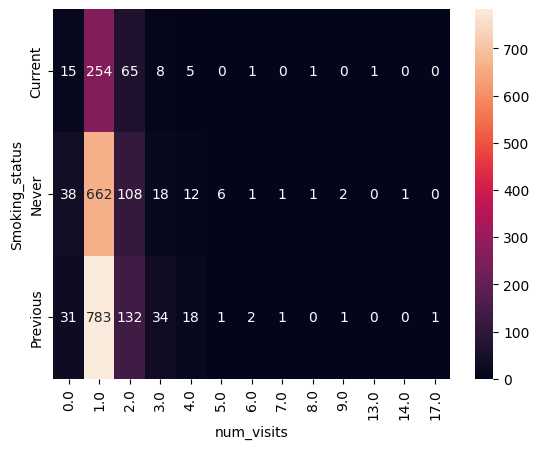

In [30]:
# Create a heatmap of the contingency table
sns.heatmap(contingency_table, annot=True, fmt='d') #kinda a bad visualization here

<Axes: xlabel='Smoking_status'>

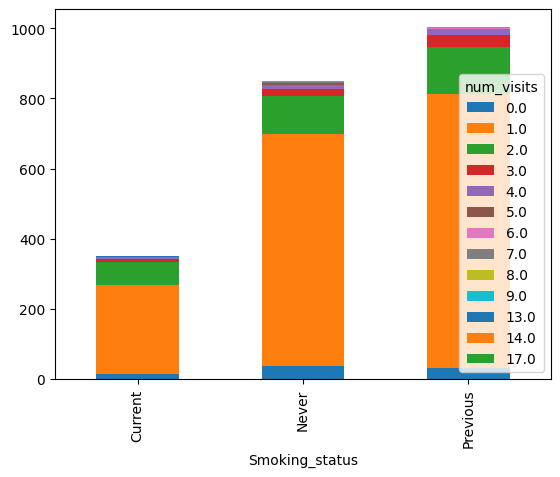

In [31]:
# Create a stacked bar plot of the contingency table
contingency_table.plot(kind='bar', stacked=True) #better

# 4. Is the number of visits higher in the Disease group than in the Healthy group?
-> t-test. Is/ is not significantly different

In [32]:
# Perform a t-test to compare the mean number of visits between the two groups
control_group = statistics_df[statistics_df['Group'] == 'Control']['num_visits']
control_group

1       1.0
3       1.0
8       2.0
15      1.0
16      0.0
       ... 
2184    2.0
2188    1.0
2193    1.0
2205    1.0
2210    1.0
Name: num_visits, Length: 565, dtype: float64

In [33]:
healthy_group = statistics_df[statistics_df['Group'] == 'Healthy']['num_visits']
healthy_group

0       2.0
2       2.0
4       2.0
5       1.0
6       2.0
       ... 
2207    1.0
2208    1.0
2209    4.0
2211    1.0
2212    2.0
Name: num_visits, Length: 1648, dtype: float64

In [34]:
t_stat, p_value = ttest_ind(control_group, healthy_group)

# Print the results
print(f"T-test statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The number of visits is significantly different between the Disease and Healthy groups.")
else:
    print("The number of visits is not significantly different between the Disease and Healthy groups.")

T-test statistic: 0.15
P-value: 0.8808
The number of visits is not significantly different between the Disease and Healthy groups.


<Axes: xlabel='Group', ylabel='num_visits'>

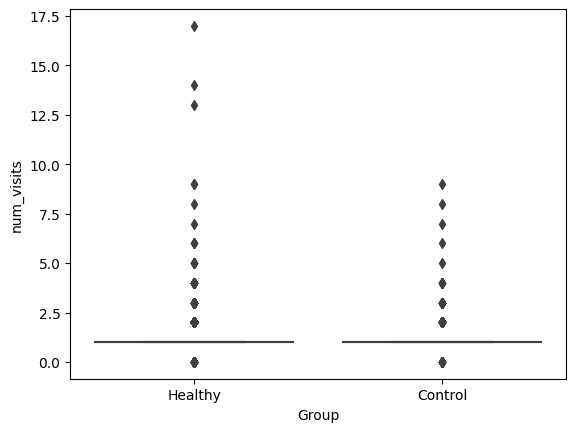

In [35]:
# Create a box plot of num_visits by group
sns.boxplot(x='Group', y='num_visits', data=statistics_df)



<Axes: xlabel='Group', ylabel='num_visits'>

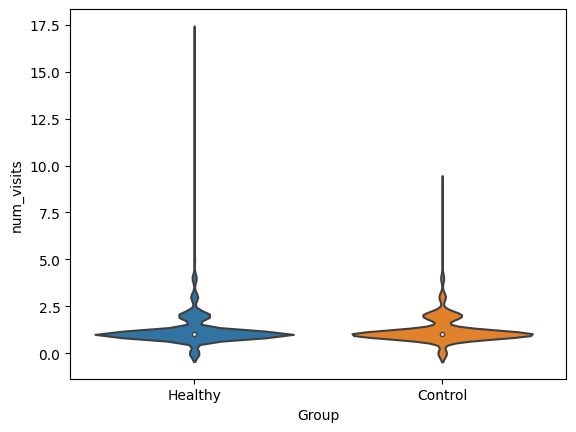

In [36]:
# Create a violin plot of num_visits by group
sns.violinplot(x='Group', y='num_visits', data=statistics_df)

# 5. Do Male has a higher current smoke percentage compared to Female?
-> Chi-squared. Is/ is not significantly different

In [37]:
# Create a contingency table of Smoking_status by Sex
contingency_table = pd.crosstab(statistics_df['Smoking_status'] == 'Current', statistics_df['Sex'])
contingency_table

Sex,Female,Male
Smoking_status,,
False,530,1333
True,106,244


In [38]:
# Perform a chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared test statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("The proportion of current smokers is significantly different between males and females.")
else:
    print("The proportion of current smokers is not significantly different between males and females.")

Chi-squared test statistic: 0.40
P-value: 0.5271
The proportion of current smokers is not significantly different between males and females.


In [39]:
# Count the number of males and females in the dataset
sex_counts = statistics_df['Sex'].value_counts()

# Print the results
print(f"Number of males: {sex_counts['Male']}")
print(f"Number of females: {sex_counts['Female']}")

Number of males: 1577
Number of females: 636


<Axes: xlabel='Sex', ylabel='count'>

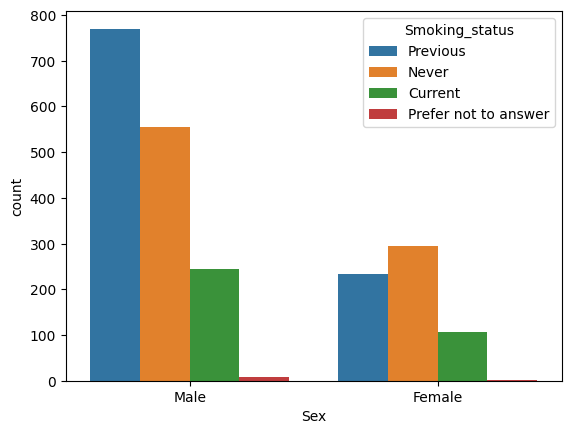

In [40]:
# Create a bar plot of Smoke status by sex
sns.countplot(x='Sex', hue='Smoking_status', data=statistics_df)

<Axes: xlabel='Sex', ylabel='count'>

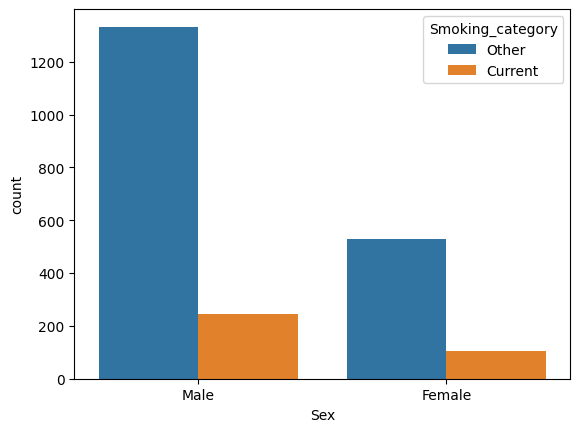

In [41]:
# Define a function to map the Smoking_status column to 'Current' and 'Other' labels
def map_smoking_status(smoking_status):
    if smoking_status == 'Current':
        return 'Current'
    else:
        return 'Other'

# Apply the function to the Smoking_status column
statistics_df['Smoking_category'] = statistics_df['Smoking_status'].apply(map_smoking_status)

# Create a bar plot of Smoking_category by sex
sns.countplot(x='Sex', hue='Smoking_category', data=statistics_df)

# summary
1. Is the BMI different between the healthy and control group? <br />
-> No, the BMI is not significantly different between the Disease and Healthy groups.
2. Is the proportion of Smoke status different between the healthy and control group? <br />
-> No, the proportion of smoking status is not significantly different between the healthy and control groups.
3. Is the smoke status related to the number of Hospital visits regardless of the disease? (ignore the "Prefer not to answer")<br /> 
-> No, the smoke status is not significantly related to the number of hospital visits.
4. Is the number of visits higher in the Disease group than in the Healthy group? <br />
-> No, the number of visits is not significantly different between the Disease and Healthy groups.
5. Do Male has a higher current smoke percentage compared to Female? <br />
-> No, the proportion of current smokers is not significantly different between males and females.